In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger

In [6]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

def model1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=(299, 299, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), padding='same'))
#     model.add(Activation('relu'))
#     model.add(Conv2D(64, (3, 3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    return model

In [7]:
train_dir = '../Data/bird_or_bicycle/0.0.3/train/'
test_dir = '../Data/bird_or_bicycle/0.0.3/test/'

train_idg = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

#train_idg = ImageDataGenerator(rescale=1./255)
test_idg = ImageDataGenerator(rescale=1./255)

In [8]:
train_gen = train_idg.flow_from_directory(train_dir,
                                          batch_size=20,
                                          class_mode='binary',
                                          target_size=(299, 299))
test_gen = test_idg.flow_from_directory(test_dir,
                                        batch_size=20,
                                        class_mode='binary',
                                        target_size=(299, 299))

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
model = model1()

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 299, 299, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 297, 297, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 700928)            0         
__________

In [ ]:
model_type = 'vgg'
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
dirpath = 'vgg_bird_saved_models/'
filepath = dirpath + model_name

Path(dirpath).mkdir(parents=True, exist_ok=True)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

csvlog = CSVLogger(dirpath + 'log.csv')

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit_generator(train_gen, validation_data=test_gen, workers=4,
                              epochs=10, steps_per_epoch=50, validation_steps=50)

In [14]:
tmp = model.layers[3]
tmp.get_config()

{'data_format': 'channels_last',
 'name': 'block1_pool',
 'padding': 'valid',
 'pool_size': (2, 2),
 'strides': (2, 2),
 'trainable': True}

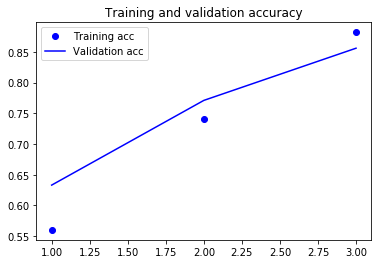

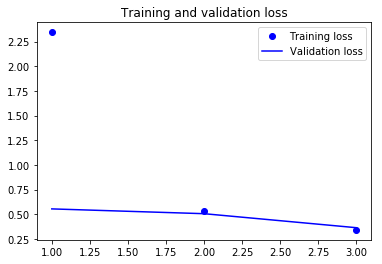

In [9]:
plot_history(history)

In [27]:
model.evaluate_generator(test_gen, steps=50, workers=4, verbose=1)

50/50 [==============================] - 2s 42ms/step


[0.3563115218281746, 0.8610000014305115]